In [1]:
#IMPORTANDO LIBRERIAS NECESARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

| **Category**             | **Variables**                                                        | **Keyword**   |
|-------------------------|----------------------------------------------------------------------|---------------|
| Education and Training  | `education`, `educationfield`, `trainingtimeslastyear`              | education     |
| Work Conditions         | `businesstravel`, `distancefromhome`, `overtime`, `remotework`      | remotework    |
| Function and Department | `department`, `jobrole`, `joblevel`, `roledepartament`              | jobrole       |


## Documentacion del Analise
- Dividimos la busqueda por generacion (Gen Z, Gen X, Millenials, Baby Boomers)
- Criamos una variable para explorar los empleados que estan en la empresa actualmente (attrition == no)
- No hay variacion de job satisfaction por generacion en general, pero cuando la investigamos por job role por ejemplo si que hay (considerar que - No hay baby boomers como Research Director y Sales Representative y no hay Gen Z en Research Director)
- Las personas de nivel educativo 2, 3, 4 y 5 tienen el mismo sueldo (el nivel 3 de educacion es el nivel que tiene mas empleados con el valor de sueldo intermedio de 5.362)
- Los Baby Boomers de Laboratory Technician son los que tienen menor job satisfaccion
- Los Baby Boomers en Manufacturing Directors, Rserach Scientist y Health Care Reprersentative son los con job satisfaction mas alto
- los baby boomers tiene mas satisfaccion cuando trabajan presencial

## Otros
- Tenemos un grafico que queremos pedir la ayuda de Cesar manana para compreeender mejor

## Proximos Pasos

- Overtime - Analisar variable con los datos que tengo (60%) - Si tienen 60% dos datos podemos hacer inferencia en el futuro


In [13]:
df = pd.read_csv("df_limpio_final.csv", index_col=0)
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome_$',
       'monthlyrate_$', 'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'datebirth', 'salary', 'roledepartament',
       'remotework'],
      dtype='object')

In [3]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome_$,monthlyrate_$,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework
0,53,No,NaN,2015.722222,NaN,6,3,NaN,1,1,Male,3,5,research director,3,NaN,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,5,3.0,20,15.0,15,15,1972,195370.00,NaN,True
1,54,No,NaN,2063.388889,NaN,1,4,Life Sciences,2,3,Male,2,5,manager,3,NaN,NaN,43331.17,0,Unknown,14,3.0,1,Unknown,1,5,3.0,33,11.0,11,9,1971,199990.00,NaN,True
2,44,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,3,3,Male,3,5,manager,4,married,NaN,41669.33,1,No,11,3.0,4,Unknown,0,3,Unknown,22,11.0,11,15,1981,192320.00,manager - research & development,True
3,49,No,travel_rarely,1771.404762,NaN,2,4,Medical,4,1,Female,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,2,Unknown,20,5.0,5,6,1976,171690.00,NaN,False
4,48,No,NaN,1582.771346,NaN,3,3,Technical Degree,5,1,Female,4,4,sales executive,1,divorced,12783.92,33238.20,2,No,12,3.0,4,Full Time,1,5,3.0,19,2.0,2,8,1977,153407.04,NaN,False


# Educacion

In [4]:
# Lista das colunas da categoria educacion
educacion =  [
        "education",
        "educationfield",
        "trainingtimeslastyear"]

df_edu = df[educacion]

# Visualizar o resultado
df_edu.head()


,education,educationfield,trainingtimeslastyear
0,3,NaN,5
1,4,Life Sciences,5
2,2,Technical Degree,3
3,4,Medical,2
4,3,Technical Degree,5


In [5]:
# desglosar attrition para entender si hay como identificar, bajas, jubilacion, 
# mirar attrition por edad
# jubilacion en California a los 67 anos
# atrition -> categorica 
# edad -> numerica 

""" df_activos = df[df['age'] < 67] # residual: los que son mayores de 67 podrian no estar jubilados 
df_activos """

" df_activos = df[df['age'] < 67] # residual: los que son mayores de 67 podrian no estar jubilados \ndf_activos "

In [6]:
""" edu_salary = df_activos.groupby('education')['monthlyincome_$'].mean().reset_index()
print(edu_salary) """

# nos parece que el nivel 1 de estudios gana el mayor sueldo quiza porque tiene capacitacion tecnica y no necesita de estudios superiores
# confirmar con Product Owner 
# El producto Owner nos enseno que hay un numero extremos influyendo en las medias, asi que hicimos la mediana 

" edu_salary = df_activos.groupby('education')['monthlyincome_$'].mean().reset_index()\nprint(edu_salary) "

In [9]:
""" edu_salary = df_activos.groupby('education')['monthlyincome_$'].median().reset_index()
print(edu_salary) """

# quiza tenemos un valor extremo en educacion 1 que tenga influido en la media (codigo anterior)


" edu_salary = df_activos.groupby('education')['monthlyincome_$'].median().reset_index()\nprint(edu_salary) "

In [ ]:
# df_activos['education'].value_counts()
# el nivel 5 podrian ser los cargos ejecutivos con mayor nivel de educacion y con menor numero de empleados

education
3    649
4    461
2    322
1    186
5     60
Name: count, dtype: int64

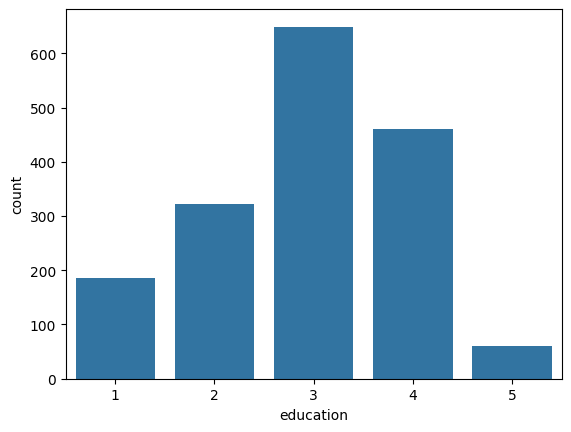

In [ ]:
# sns.countplot(data=df_activos, x='education');
# el nivel 3 de educacion es el nivel que tiene mas empleados con el valor de sueldo intermedio de 5.362

In [ ]:
#df_activos.groupby('education')['attrition'].count().reset_index()

,education,attrition
0,1,186
1,2,322
2,3,649
3,4,461
4,5,60


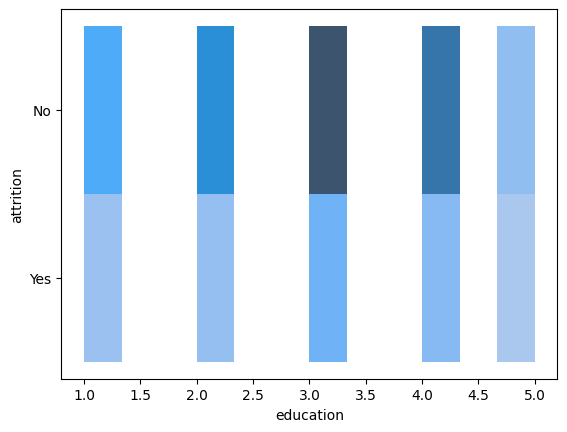

In [ ]:
# sns.histplot(data=df_activos, x='education', y='attrition');

In [ ]:
# por educacion 
""" atisf_generacion_edu = 

plt.figure(figsize=(12, 6))
sns.barplot(
    data=satisf_generacion_edu,
    x='education',
    y='jobsatisfaction',
    hue='generacion',
    palette='Set2' """

In [25]:
df = pd.read_csv("df_definitivo.csv", index_col=0)
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome_$',
       'monthlyrate_$', 'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'datebirth', 'salary', 'remotework'],
      dtype='object')

# Edad

In [26]:
def clasificar_generacion(year):
    if year >= 1997:
        return 'Gen Z'
    elif year >= 1981:
        return 'Millennials'
    elif year >= 1965:
        return 'Gen X'
    elif year >= 1946:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

In [27]:
df['age'].unique()

array([53, 54, 44, 49, 48, 50, 61, 43, 58, 40, 57, 42, 60, 37, 47, 35, 38,
       36, 55, 45, 62, 34, 39, 51, 41, 52, 46, 32, 31, 33, 56, 59, 29, 30,
       28, 27, 26, 25, 24, 23, 22, 21, 20])

In [28]:
df['generation'] = df['datebirth'].apply(clasificar_generacion)

In [29]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome_$',
       'monthlyrate_$', 'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'datebirth', 'salary', 'remotework',
       'generation'],
      dtype='object')

In [22]:
df[['age', 'datebirth', 'generation']].head()

,age,datebirth,generation
0,53,1972,Gen X
1,54,1971,Gen X
2,44,1981,Millennials
3,49,1976,Gen X
4,48,1977,Gen X


In [ ]:
# gen y satisfaccion

In [ ]:
satisfaccion_generacion = df.groupby('generation')['jobsatisfaction'].mean().reset_index()

print(satisfaccion_generacion)

     generation  jobsatisfaction
0  Baby Boomers         2.875000
1         Gen X         2.743529
2         Gen Z         2.750000
3   Millennials         2.739791


In [ ]:
# Trabajar con personas attrition no para saber que personas trabajan actualmente

In [ ]:
df_attrition_no = df.loc[df['attrition'] == 'No']
df_attrition_no

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome_$,monthlyrate_$,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework,generation
0,53,No,NaN,2015.722222,NaN,6,3,NaN,1,1,Male,3,5,research director,3,NaN,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,5,3.0,20,15.0,15,15,1972,195370.00,NaN,True,Gen X
1,54,No,NaN,2063.388889,NaN,1,4,Life Sciences,2,3,Male,2,5,manager,3,NaN,NaN,43331.17,0,Unknown,14,3.0,1,Unknown,1,5,3.0,33,11.0,11,9,1971,199990.00,NaN,True,Gen X
2,44,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,3,3,Male,3,5,manager,4,married,NaN,41669.33,1,No,11,3.0,4,Unknown,0,3,Unknown,22,11.0,11,15,1981,192320.00,manager - research & development,True,Millennials
3,49,No,travel_rarely,1771.404762,NaN,2,4,Medical,4,1,Female,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,2,Unknown,20,5.0,5,6,1976,171690.00,NaN,False,Gen X
4,48,No,NaN,1582.771346,NaN,3,3,Technical Degree,5,1,Female,4,4,sales executive,1,divorced,12783.92,33238.20,2,No,12,3.0,4,Full Time,1,5,3.0,19,2.0,2,8,1977,153407.04,NaN,False,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,45,No,NaN,488.944444,NaN,26,3,Medical,824,2,Female,4,1,research scientist,3,single,3949.17,10267.83,4,Unknown,12,3.0,4,Part Time,0,2,3.0,3,1.0,1,2,1980,47390.04,NaN,True,Gen X
1674,49,No,NaN,1973.984127,NaN,26,4,NaN,1087,4,Female,3,5,manager,3,married,15943.72,41453.67,3,No,11,3.0,3,Full Time,1,2,3.0,5,1.0,1,0,1976,191324.62,NaN,False,Gen X
1675,31,No,travel_rarely,290.035510,NaN,15,3,NaN,528,3,Male,3,1,research scientist,4,NaN,NaN,6090.75,1,No,19,3.0,1,Part Time,0,1,3.0,6,1.0,1,5,1994,28111.13,NaN,False,Millennials
1676,49,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,76,3,Female,2,3,manufacturing director,2,divorced,8339.32,21682.23,8,Yes,12,0.0,3,Part Time,1,4,3.0,22,14.0,14,10,1976,100071.84,NaN,True,Gen X


In [ ]:
satisfaccion_generacion = df.loc[df['attrition'] == 'No'].groupby('generation')['jobsatisfaction'].mean().reset_index()
print(satisfaccion_generacion)

     generation  jobsatisfaction
0  Baby Boomers         2.875000
1         Gen X         2.746631
2         Gen Z         2.857143
3   Millennials         2.792222


In [ ]:
# gen y satisfaccion grafico

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_10951/393810452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


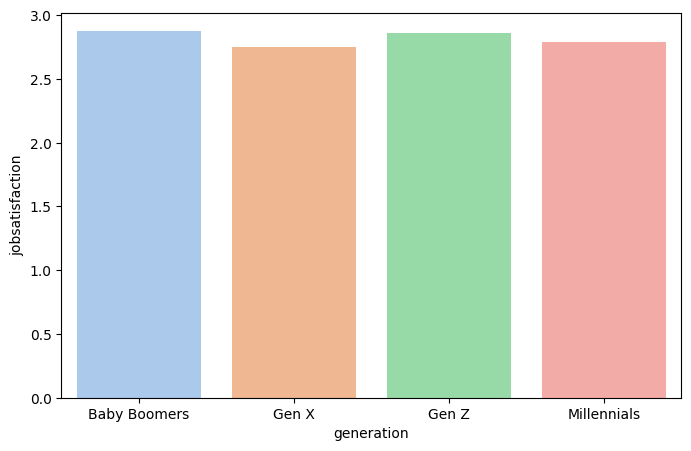

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=satisfaccion_generacion,
    x='generation',
    y='jobsatisfaction',
    palette='pastel');

## Pedir ayuda a Cesar a interpretar esta tabla

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_10951/1650967527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


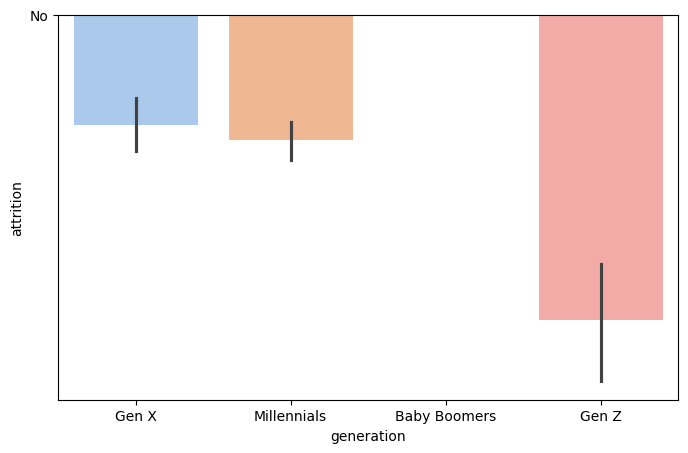

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='generation',
    y='attrition',
    palette='pastel');

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_10951/3955698026.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


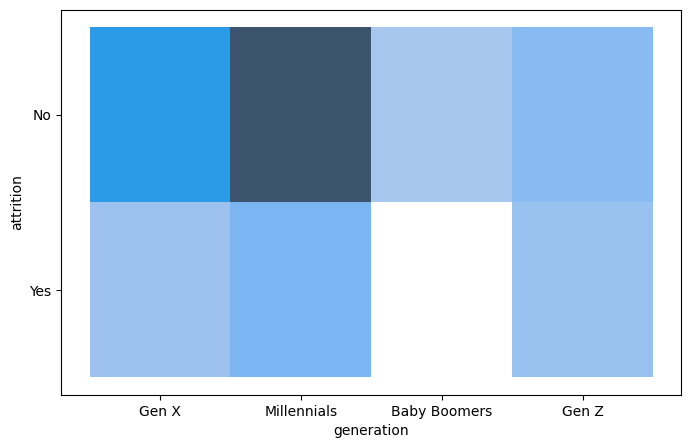

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='generation',
    y='attrition',
    palette='pastel');

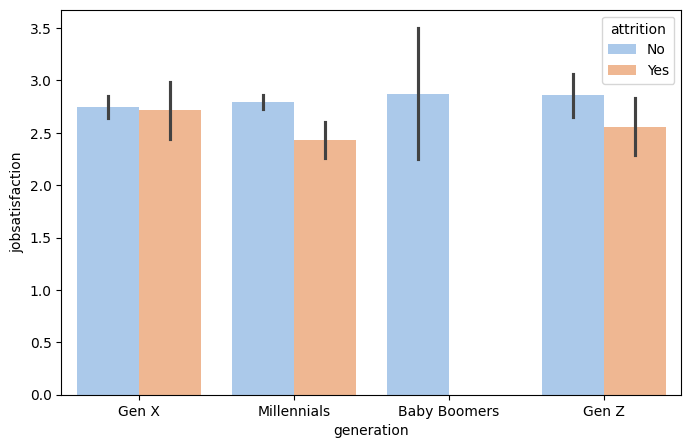

In [ ]:
# gen y job 

plt.figure(figsize=(8,5))
sns.barplot(data=df,
    x='generation',
    y='jobsatisfaction', hue='attrition',
    palette='pastel');

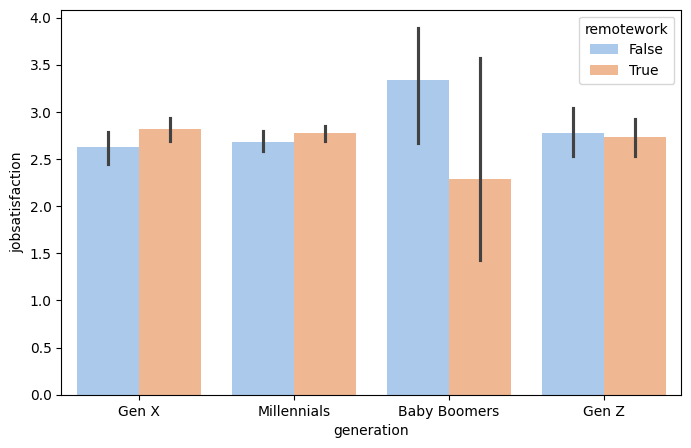

In [ ]:
# gen y trabajo remoto
# los baby boomers tiene mas satisfaccion cuando trabajan presencial?

plt.figure(figsize=(8,5))
sns.barplot(data=df,
    x='generation',
    y='jobsatisfaction', hue='remotework',
    palette='pastel');

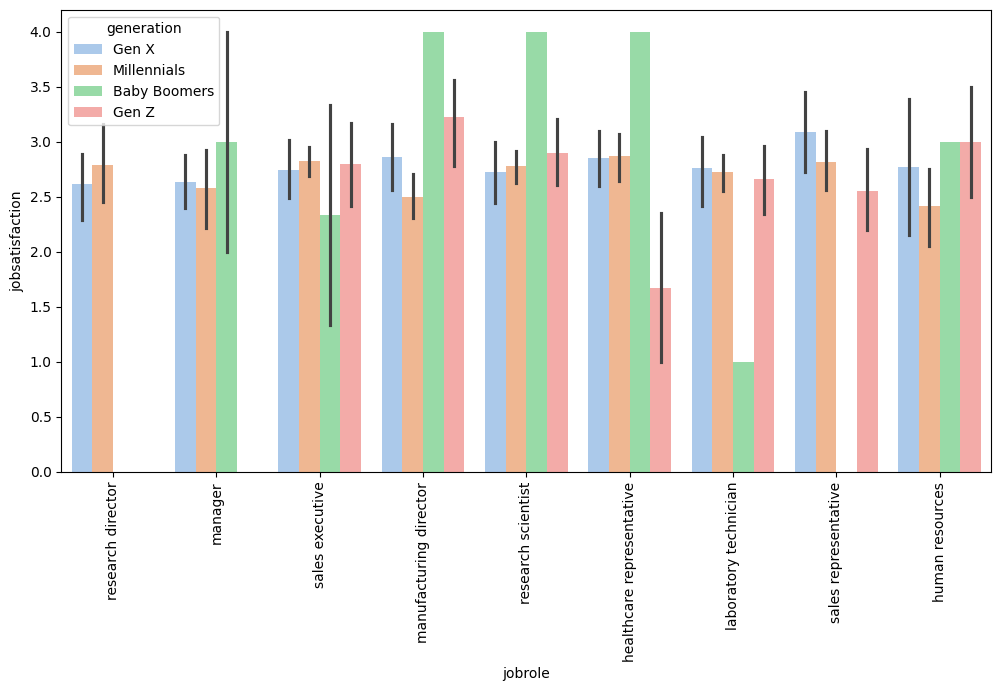

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,
    x='jobrole',
    y='jobsatisfaction', hue='generation',
    palette='pastel')
plt.xticks(rotation=90);

- Hay que investigar si en Research Director y Sales Representative los Baby Boomers estan insatisfechos o si no hay baby boomers en estes job roles 


- lo mismo del anterior para la Gen Z en Research Director


In [ ]:
# no hay Baby Boomers 
# no hay Gen Z
df.groupby(['jobrole', 'generation']).size().reset_index()

,jobrole,generation,0
0,healthcare representative,Baby Boomers,1
1,healthcare representative,Gen X,54
2,healthcare representative,Gen Z,3
3,healthcare representative,Millennials,97
4,human resources,Baby Boomers,2
5,human resources,Gen X,13
6,human resources,Gen Z,8
7,human resources,Millennials,36
8,laboratory technician,Baby Boomers,1
9,laboratory technician,Gen X,46


In [11]:
df['jobrole'].unique()

array(['research director', 'manager', 'sales executive',
       'manufacturing director', 'research scientist',
       'healthcare representative', 'laboratory technician',
       'sales representative', 'human resources'], dtype=object)

- Overtime - Analisar variable con los datos que tengo (60%) - Si tienen 60% dos datos podemos hacer inferencia en el futuro

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,
    x='jobrole',
    y='jobsatisfaction', hue='generation',
    palette='pastel')
plt.xticks(rotation=90);

In [31]:
df["overtime"].value_counts()


overtime
No         682
Unknown    676
Yes        256
Name: count, dtype: int64

In [32]:
def filter_overtime(df):
    return df[df["overtime"] != "Unknown"]


In [33]:
df_overtime_clean = filter_overtime(df)


In [34]:
df_overtime_clean

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome_$,monthlyrate_$,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,generation
0,53,No,NaN,2015.722222,research & development,6,3,NaN,1,1,Male,3,5,research director,3,NaN,16280.830000,42330.17,7,No,13,3.0,3,Full Time,0,5,3.0,20,15.0,15,15,1972,195370.00,True,Gen X
2,44,No,travel_rarely,1984.253968,research & development,4,2,Technical Degree,3,3,Male,3,5,manager,4,married,39685.079365,41669.33,1,No,11,3.0,4,Unknown,0,3,Unknown,22,11.0,11,15,1981,192320.00,True,Millennials
4,48,No,NaN,1582.771346,sales,3,3,Technical Degree,5,1,Female,4,4,sales executive,1,divorced,12783.920000,33238.20,2,No,12,3.0,4,Full Time,1,5,3.0,19,2.0,2,8,1977,153407.04,False,Gen X
5,50,No,NaN,1771.920635,research & development,22,3,Medical,6,4,Female,3,4,manager,4,NaN,14311.670000,37210.33,3,No,11,3.0,2,Full Time,1,3,3.0,22,4.0,4,7,1975,171740.04,True,Gen X
7,44,No,travel_rarely,556.256661,sales,1,1,NaN,8,2,Male,3,2,sales executive,3,married,11125.133220,11681.39,1,No,25,4.0,3,Part Time,0,3,3.0,20,11.0,11,6,1981,53914.11,False,Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,44,No,travel_frequently,1973.984127,NaN,8,3,NaN,1598,2,Male,3,5,manager,4,NaN,39479.682540,41453.67,1,No,13,3.0,2,Full Time,1,4,2.0,24,14.0,14,9,1981,191324.62,True,Millennials
1603,46,No,NaN,290.035510,research & development,9,2,NaN,1604,2,Male,3,1,research scientist,1,NaN,5800.710195,6090.75,1,Yes,13,3.0,4,Part Time,0,0,3.0,8,7.0,7,1,1979,28111.13,False,Gen X
1604,43,Yes,NaN,290.035510,research & development,2,4,Life Sciences,1605,2,Female,1,1,laboratory technician,4,divorced,5800.710195,6090.75,4,Yes,13,3.0,3,Part Time,1,1,2.0,7,1.0,1,0,1982,28111.13,True,Millennials
1611,41,No,travel_rarely,1032.487286,sales,13,5,NaN,1612,1,Male,4,3,sales executive,3,single,20649.745724,21682.23,0,No,18,3.0,4,Part Time,0,3,3.0,8,0.0,0,7,1984,100071.84,True,Millennials


| Gráfico         | Tipo de variable           | Nº de variables | Uso típico                                                  | Función Seaborn / Matplotlib     |
|----------------|----------------------------|------------------|--------------------------------------------------------------|----------------------------------|
| **Histograma** | Numérica (cuantitativa)    | Univariada       | Distribución de frecuencia de una variable numérica          | `sns.histplot()`                 |
| **Countplot**  | Categórica                 | Univariada       | Conteo de ocurrencias por categoría                          | `sns.countplot()`                |
| **Barplot**    | Categórica + Numérica      | Bivariada        | Comparar medias (o sumas) de una variable numérica por grupo | `sns.barplot()`                  |
| **Boxplot**    | Numérica + Categórica      | Bivariada        | Distribución, mediana y valores atípicos por categoría       | `sns.boxplot()`                  |
| **Scatterplot**| Numérica + Numérica        | Bivariada        | Relación entre dos variables numéricas (correlación)         | `sns.scatterplot()`              |
| **Gráfico de Tarta** | Categórica            | Univariada       | Proporción relativa entre categorías                        | `plt.pie()` (con Matplotlib)     |

### Utilizar el contenido aprendido sobre gráficos (Seaborn/Matplotib) para comparar las columnas con enfoque en condiciones de carrera 


### 📊 Lo que queremos saber?

- Uso: 

tipo de variable: 

numero de variables:

grafico: 

funcion: 

------------------------------------------------------
